In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import files
uploaded = files.upload()


Saving DataCoSupplyChainDataset.csv to DataCoSupplyChainDataset.csv


In [5]:
data = pd.read_csv('DataCoSupplyChainDataset.csv', encoding='latin1')

In [6]:
data

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 1:34,Second Class
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 21:00,Standard Class
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/18/2016 20:18,Standard Class


In [7]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [8]:
# Handle Missing Values
data.isnull().sum()

,0
Type,0
Days for shipping (real),0
Days for shipment (scheduled),0
Benefit per order,0
Sales per customer,0
Delivery Status,0
Late_delivery_risk,0
Category Id,0
Category Name,0
Customer City,0


In [9]:
# Replace missing values in 'Customer Lname' with "NotDetermined"
data['Customer Lname'] = data['Customer Lname'].fillna("NotDetermined")

# Create 'Customer Full Name' by combining 'Customer Fname' and 'Customer Lname'
data['Customer Full Name'] = data['Customer Fname'].astype(str) + data['Customer Lname'].astype(str)

In [10]:
data2=data.drop(['Customer Email','Product Status','Customer Fname','Customer Lname',
           'Product Description','Product Image','Order Zipcode','Customer Zipcode','Customer Password'],axis=1)
data2.shape

(180519, 45)

In [11]:
# Handle Missing Values
data2.isnull().sum()

,0
Type,0
Days for shipping (real),0
Days for shipment (scheduled),0
Benefit per order,0
Sales per customer,0
Delivery Status,0
Late_delivery_risk,0
Category Id,0
Category Name,0
Customer City,0


In [12]:
#Column Names Normalization
data2.columns = [col.lower().replace(' ', '_') for col in data2.columns]
data2.rename(columns=lambda x: x.replace("(", "").replace(")", ""), inplace=True)
data2.columns

Index(['type', 'days_for_shipping_real', 'days_for_shipment_scheduled',
       'benefit_per_order', 'sales_per_customer', 'delivery_status',
       'late_delivery_risk', 'category_id', 'category_name', 'customer_city',
       'customer_country', 'customer_id', 'customer_segment', 'customer_state',
       'customer_street', 'department_id', 'department_name', 'latitude',
       'longitude', 'market', 'order_city', 'order_country',
       'order_customer_id', 'order_date_dateorders', 'order_id',
       'order_item_cardprod_id', 'order_item_discount',
       'order_item_discount_rate', 'order_item_id', 'order_item_product_price',
       'order_item_profit_ratio', 'order_item_quantity', 'sales',
       'order_item_total', 'order_profit_per_order', 'order_region',
       'order_state', 'order_status', 'product_card_id', 'product_category_id',
       'product_name', 'product_price', 'shipping_date_dateorders',
       'shipping_mode', 'customer_full_name'],
      dtype='object')

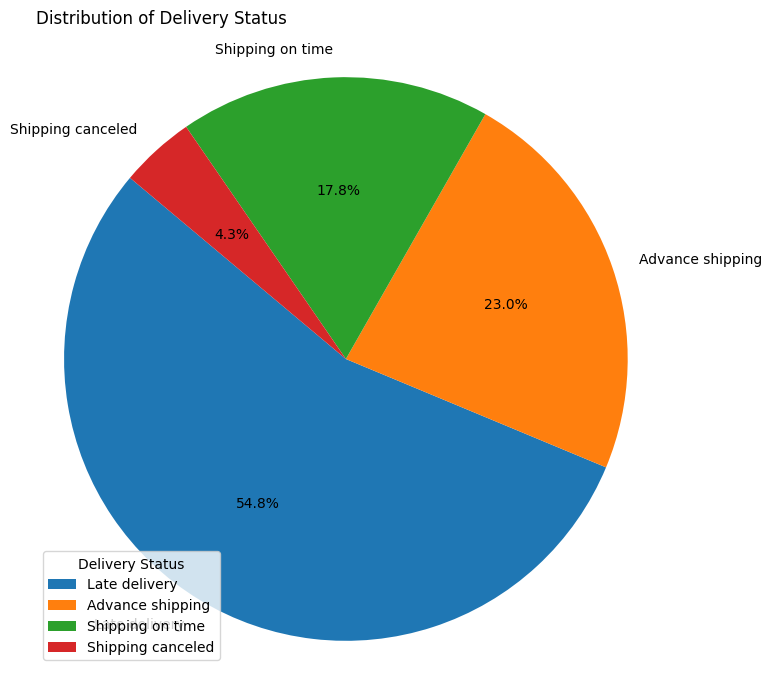

In [13]:
# Count the occurrences of each delivery status
delivery_status_counts = data2['delivery_status'].value_counts()

# Plot pie chart for delivery status
plt.figure(figsize=(8, 8))
plt.pie(delivery_status_counts, labels=delivery_status_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Delivery Status', loc='left', pad=20)
plt.axis('equal')
plt.legend(delivery_status_counts.index, title='Delivery Status', loc='best')
plt.show()

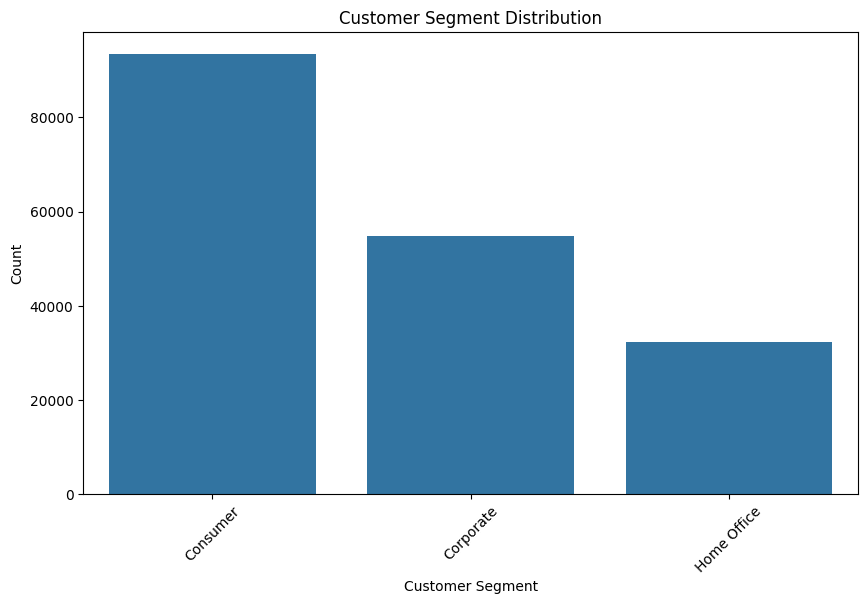

In [14]:
customer_segment_counts = data2['customer_segment'].value_counts()
# Plotting Customer Segment Counts
plt.figure(figsize=(10, 6))
sns.barplot(x=customer_segment_counts.index, y=customer_segment_counts.values)
plt.title('Customer Segment Distribution')
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#print(data2.columns)

In [15]:

delivery_status_data = data2['delivery_status']
shipping_mode_data = data2['shipping_mode']

# Create a cross-tabulation (contingency table) to analyze the relationship
cross_tab = pd.crosstab(shipping_mode_data, delivery_status_data)

# Calculate row percentages
cross_tab_percent = cross_tab.div(cross_tab.sum(1), axis=0) * 100

# Display the cross-tabulation with percentages
print("Cross-Tabulation (Contingency Table) with Percentages:")
print(cross_tab_percent)

Cross-Tabulation (Contingency Table) with Percentages:
delivery_status  Advance shipping  Late delivery  Shipping canceled  \
shipping_mode                                                         
First Class              0.000000      95.322499           4.677501   
Same Day                 0.000000      45.743042           4.559926   
Second Class             0.000000      76.632781           4.003862   
Standard Class          38.599748      38.071683           4.268134   

delivery_status  Shipping on time  
shipping_mode                      
First Class              0.000000  
Same Day                49.697032  
Second Class            19.363358  
Standard Class          19.060435  


In [ ]:
#data2['days_for_shipping_real'] = pd.to_numeric(data2['days_for_shipping_real'], errors='coerce')
#data2['days_for_shipment_scheduled'] = pd.to_numeric(data2['days_for_shipment_scheduled'], errors='coerce')



In [16]:
#Rule based flag for Supplier shippment delay risk
if 'days_for_shipping_real' in data2.columns and 'days_for_shipment_scheduled' in data2.columns:
    # Create 'Late_delivery_risk' column: 1 = Late Delivery, 0 = On-time
    data2['late_delivery_risk'] = data2.apply(
        lambda row: 1 if row['days_for_shipping_real'] > row['days_for_shipment_scheduled'] else 0, axis=1
    )
    print("Column 'late_delivery_risk' successfully created.")
else:
    print("Required columns 'Days for shipping (real)' or 'Days for shipment (scheduled)' are missing.")

# Display sample rows
print(data2[['days_for_shipping_real', 'days_for_shipment_scheduled', 'late_delivery_risk']].head())



Column 'late_delivery_risk' successfully created.
   days_for_shipping_real  days_for_shipment_scheduled  late_delivery_risk
0                       3                            4                   0
1                       5                            4                   1
2                       4                            4                   0
3                       3                            4                   0
4                       2                            4                   0


In [17]:
data2['late_delivery_risk'] = pd.to_numeric(data2['late_delivery_risk'], errors='coerce')

In [18]:
# Rule 1: Logistics Inefficiency (High Order Quantity and Low Profit Ratio)
# We'll assume 'order_item_quantity' and 'order_item_profit_ratio' are the relevant columns for this rule.
# Flag as inefficiency if order_item_quantity is high (let's say > a certain threshold) and profit ratio is low (< threshold)

# Define thresholds for logistics inefficiency
quantity_threshold = 4 # Adjust based on your data
profit_ratio_threshold = 0.05  # Adjust based on your data (e.g., low profit ratio near 0)

data2['Logistics_Inefficiency_Flag'] = data2.apply(
    lambda row: 1 if (row['order_item_quantity'] > quantity_threshold and row['order_item_profit_ratio'] < profit_ratio_threshold) else 0,
    axis=1
)

# Rule 2: Order Status indicating logistical disruptions
# If the order status is either 'CANCELLED' or 'PROCESSING', flag as logistical disruption

data2['Logistical_Disruption_Flag'] = data2['order_status'].apply(
    lambda x: 1 if x in ['CANCELLED', 'PROCESSING'] else 0
)

# Combine the flags into a single column to indicate any logistical issues
data2['Overall_Logistics_Risk_Flag'] = data2.apply(
    lambda row: 1 if (row['Logistics_Inefficiency_Flag'] == 1 or row['Logistical_Disruption_Flag'] == 1) else 0,
    axis=1
)

# Summary: Count of logistics-related risks identified
logistics_risk_summary = data2[['Logistics_Inefficiency_Flag', 'Logistical_Disruption_Flag', 'Overall_Logistics_Risk_Flag']].sum()

# Display results
print("Summary of Identified Logistics Risks:")
print(logistics_risk_summary)

# Optional: Display a few rows with the logistics risk flags
print("\nSample Data with Logistics Risk Flags:")
print(data2[['order_item_quantity', 'order_item_profit_ratio', 'order_status',
         'Logistics_Inefficiency_Flag', 'Logistical_Disruption_Flag', 'Overall_Logistics_Risk_Flag']].head())


Summary of Identified Logistics Risks:
Logistics_Inefficiency_Flag     4498
Logistical_Disruption_Flag     21902
Overall_Logistics_Risk_Flag    25858
dtype: int64

Sample Data with Logistics Risk Flags:
   order_item_quantity  order_item_profit_ratio     order_status  \
0                    1                     0.29         COMPLETE   
1                    1                    -0.80          PENDING   
2                    1                    -0.80           CLOSED   
3                    1                     0.08         COMPLETE   
4                    1                     0.45  PENDING_PAYMENT   

   Logistics_Inefficiency_Flag  Logistical_Disruption_Flag  \
0                            0                           0   
1                            0                           0   
2                            0                           0   
3                            0                           0   
4                            0                           0   

   Overall_Logi

In [19]:
data2

,type,days_for_shipping_real,days_for_shipment_scheduled,benefit_per_order,sales_per_customer,delivery_status,late_delivery_risk,category_id,category_name,customer_city,...,product_card_id,product_category_id,product_name,product_price,shipping_date_dateorders,shipping_mode,customer_full_name,Logistics_Inefficiency_Flag,Logistical_Disruption_Flag,Overall_Logistics_Risk_Flag
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,1360,73,Smart watch,327.750000,2/3/2018 22:56,Standard Class,CallyHolloway,0,0,0
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,1360,73,Smart watch,327.750000,1/18/2018 12:27,Standard Class,IreneLuna,0,0,0
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,1360,73,Smart watch,327.750000,1/17/2018 12:06,Standard Class,GillianMaldonado,0,0,0
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,1360,73,Smart watch,327.750000,1/16/2018 11:45,Standard Class,TanaTate,0,0,0
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,1360,73,Smart watch,327.750000,1/15/2018 11:24,Standard Class,OrliHendricks,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,1/20/2016 3:40,Standard Class,MariaPeterson,0,0,0
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,1/19/2016 1:34,Second Class,RonaldClark,0,0,0
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,1/20/2016 21:00,Standard Class,JohnSmith,0,0,0
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,1/18/2016 20:18,Standard Class,MarySmith,0,0,0


In [20]:
# Check for NaN values in specific columns
print(data2[['days_for_shipping_real', 'days_for_shipment_scheduled','late_delivery_risk']].isnull().sum())


days_for_shipping_real         0
days_for_shipment_scheduled    0
late_delivery_risk             0
dtype: int64


In [ ]:
#data2 = pd.DataFrame(data2)
#print(data2)

            type  days_for_shipping_real  days_for_shipment_scheduled  \
0          DEBIT                       3                            4   
1       TRANSFER                       5                            4   
2           CASH                       4                            4   
3          DEBIT                       3                            4   
4        PAYMENT                       2                            4   
...          ...                     ...                          ...   
180514      CASH                       4                            4   
180515     DEBIT                       3                            2   
180516  TRANSFER                       5                            4   
180517   PAYMENT                       3                            4   
180518   PAYMENT                       4                            4   

        benefit_per_order  sales_per_customer   delivery_status  \
0               91.250000          314.640015  Advance s

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


df=data2


df = pd.DataFrame(data2)
# Instantiate LabelEncoder
encoder = LabelEncoder()

# Skip mapping for 'late_delivery_risk' as it already contains 1 and 0
df['late_delivery_risk'] = df['late_delivery_risk']  # No change needed here

# Continue with the rest of the transformations
df['shipping_mode'] = encoder.fit_transform(df['shipping_mode'])
df['order_city'] = encoder.fit_transform(df['order_city'])
df['order_status'] = encoder.fit_transform(df['order_status'])

# Split data into features (X) and target (y)
X = df[['shipping_mode', 'order_city', 'order_status']]
y = df['late_delivery_risk']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [22]:
print(df)

            type  days_for_shipping_real  days_for_shipment_scheduled  \
0          DEBIT                       3                            4   
1       TRANSFER                       5                            4   
2           CASH                       4                            4   
3          DEBIT                       3                            4   
4        PAYMENT                       2                            4   
...          ...                     ...                          ...   
180514      CASH                       4                            4   
180515     DEBIT                       3                            2   
180516  TRANSFER                       5                            4   
180517   PAYMENT                       3                            4   
180518   PAYMENT                       4                            4   

        benefit_per_order  sales_per_customer   delivery_status  \
0               91.250000          314.640015  Advance s

In [23]:
print(df.columns)

Index(['type', 'days_for_shipping_real', 'days_for_shipment_scheduled',
       'benefit_per_order', 'sales_per_customer', 'delivery_status',
       'late_delivery_risk', 'category_id', 'category_name', 'customer_city',
       'customer_country', 'customer_id', 'customer_segment', 'customer_state',
       'customer_street', 'department_id', 'department_name', 'latitude',
       'longitude', 'market', 'order_city', 'order_country',
       'order_customer_id', 'order_date_dateorders', 'order_id',
       'order_item_cardprod_id', 'order_item_discount',
       'order_item_discount_rate', 'order_item_id', 'order_item_product_price',
       'order_item_profit_ratio', 'order_item_quantity', 'sales',
       'order_item_total', 'order_profit_per_order', 'order_region',
       'order_state', 'order_status', 'product_card_id', 'product_category_id',
       'product_name', 'product_price', 'shipping_date_dateorders',
       'shipping_mode', 'customer_full_name', 'Logistics_Inefficiency_Flag',
     

In [38]:
#randomforest
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib  # Import joblib for saving/loading models
from sklearn.ensemble import RandomForestClassifier



# Encode categorical variables (Shipping Mode, City, Delivery Status, Type, Customer Segment)
encoder = LabelEncoder()
df['shipping_mode'] = encoder.fit_transform(df['shipping_mode'])
df['order_city'] = encoder.fit_transform(df['order_city'])
df['order_status'] = encoder.fit_transform(df['order_status'])
df['delivery_status'] = encoder.fit_transform(df['delivery_status'])  # Add delivery_status encoding
df['type'] = encoder.fit_transform(df['type'])  # Add type encoding
df['customer_segment'] = encoder.fit_transform(df['customer_segment'])  # Add customer_segment encoding

# Drop rows with missing values in the target variable (late_delivery_risk)
#df = df.dropna(subset=['late_delivery_risk'])

# Split data into features (X) and target (y)
X = df[['shipping_mode', 'order_city', 'order_status', 'delivery_status', 'type', 'customer_segment']]  # Include new columns here
y = df['late_delivery_risk']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

model_file = '/content/drive/My Drive/Logistics code/random_forest_model.pkl'
joblib.dump(model, model_file)
print(f"Model saved to: {model_file}")

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Display Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Display Classification Report (Precision, Recall, F1 Score)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Model saved to: /content/drive/My Drive/Logistics code/random_forest_model.pkl
Accuracy: 99.52%
Confusion Matrix:
[[15339    60]
 [  113 20592]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     15399
           1       1.00      0.99      1.00     20705

    accuracy                           1.00     36104
   macro avg       0.99      1.00      1.00     36104
weighted avg       1.00      1.00      1.00     36104



In [25]:
#naivebayes
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



# Encode categorical variables (Shipping Mode, City, Delivery Status, Type, Customer Segment)
encoder = LabelEncoder()
df['shipping_mode'] = encoder.fit_transform(df['shipping_mode'])
df['order_city'] = encoder.fit_transform(df['order_city'])
df['order_status'] = encoder.fit_transform(df['order_status'])
df['delivery_status'] = encoder.fit_transform(df['delivery_status'])  # Add delivery_status encoding
df['type'] = encoder.fit_transform(df['type'])  # Add type encoding
df['customer_segment'] = encoder.fit_transform(df['customer_segment'])  # Add customer_segment encoding

# Drop rows with missing values in the target variable (late_delivery_risk)
#df = df.dropna(subset=['late_delivery_risk'])

# Split data into features (X) and target (y)
X = df[['shipping_mode', 'order_city', 'order_status', 'delivery_status', 'type', 'customer_segment']]  # Include new columns here
y = df['late_delivery_risk']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Naive Bayes model
model = MultinomialNB()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Display Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Display Classification Report (Precision, Recall, F1 Score)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 60.98%
Confusion Matrix:
[[ 7098  8301]
 [ 5788 14917]]
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.46      0.50     15399
           1       0.64      0.72      0.68     20705

    accuracy                           0.61     36104
   macro avg       0.60      0.59      0.59     36104
weighted avg       0.60      0.61      0.60     36104



In [26]:
#GRADIENTBOOSTER
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



# Encode categorical variables (Shipping Mode, City, Delivery Status, Type, Customer Segment)
encoder = LabelEncoder()
df['shipping_mode'] = encoder.fit_transform(df['shipping_mode'])
df['order_city'] = encoder.fit_transform(df['order_city'])
df['order_status'] = encoder.fit_transform(df['order_status'])
df['delivery_status'] = encoder.fit_transform(df['delivery_status'])  # Add delivery_status encoding
df['type'] = encoder.fit_transform(df['type'])  # Add type encoding
df['customer_segment'] = encoder.fit_transform(df['customer_segment'])  # Add customer_segment encoding

# Drop rows with missing values in the target variable (late_delivery_risk)
#df = df.dropna(subset=['late_delivery_risk'])

# Split data into features (X) and target (y)
X = df[['shipping_mode', 'order_city', 'order_status', 'delivery_status', 'type', 'customer_segment']]  # Include new columns here
y = df['late_delivery_risk']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Classifier
model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Display Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Display Classification Report (Precision, Recall, F1 Score)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 98.68%
Confusion Matrix:
[[15277   122]
 [  354 20351]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     15399
           1       0.99      0.98      0.99     20705

    accuracy                           0.99     36104
   macro avg       0.99      0.99      0.99     36104
weighted avg       0.99      0.99      0.99     36104



In [27]:
#decisiontree
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



# Encode categorical variables (Shipping Mode, City, Delivery Status, Type, Customer Segment)
encoder = LabelEncoder()
df['shipping_mode'] = encoder.fit_transform(df['shipping_mode'])
df['order_city'] = encoder.fit_transform(df['order_city'])
df['order_status'] = encoder.fit_transform(df['order_status'])
df['delivery_status'] = encoder.fit_transform(df['delivery_status'])  # Add delivery_status encoding
df['type'] = encoder.fit_transform(df['type'])  # Add type encoding
df['customer_segment'] = encoder.fit_transform(df['customer_segment'])  # Add customer_segment encoding

# Drop rows with missing values in the target variable (late_delivery_risk)
df = df.dropna(subset=['late_delivery_risk'])

# Split data into features (X) and target (y)
X = df[['shipping_mode', 'order_city', 'order_status', 'delivery_status', 'type', 'customer_segment']]  # Include new columns here
y = df['late_delivery_risk']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree classifier
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Display Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Display Classification Report (Precision, Recall, F1 Score)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 99.53%
Confusion Matrix:
[[15345    54]
 [  114 20591]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     15399
           1       1.00      0.99      1.00     20705

    accuracy                           1.00     36104
   macro avg       1.00      1.00      1.00     36104
weighted avg       1.00      1.00      1.00     36104



In [31]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [33]:
import os

# Define the directory path
directory = '/content/drive/My Drive/Logistics code'

# Create the directory if it doesn't exist
if not os.path.exists(directory):
    os.makedirs(directory)


In [52]:
output_file = '/content/drive/My Drive/Logistics code/preprocessed_data_final.csv'
data2.to_csv(output_file, index=False)
print(f"Preprocessed data saved to {output_file}")

Preprocessed data saved to /content/drive/My Drive/Logistics code/preprocessed_data_final.csv


In [53]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import joblib
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define paths on Google Drive
data_path = '/content/drive/My Drive/Logistics code/preprocessed_data_final.csv'
encoder_path = '/content/drive/My Drive/Logistics code/encoder.pkl'

# Ensure the directory exists
directory = os.path.dirname(data_path)
if not os.path.exists(directory):
    os.makedirs(directory)

# Load your dataset
data = pd.read_csv(data_path, encoding='latin1')

# List of columns to encode (adjust this based on your dataset)
columns_to_encode = ['shipping_mode', 'order_city', 'order_status', 'delivery_status', 'type', 'customer_segment']

# Initialize the encoder
encoder = LabelEncoder()

# Fit and transform the data
for column in columns_to_encode:
    data[column] = encoder.fit_transform(data[column])

# Save the encoder as a .pkl file
joblib.dump(encoder, encoder_path)

print(f"Encoder saved as '{encoder_path}'.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Encoder saved as '/content/drive/My Drive/Logistics code/encoder.pkl'.


In [56]:
import pandas as pd
import time
import os
from sklearn.ensemble import RandomForestClassifier
from watchdog.observers import Observer
from watchdog.events import FileSystemEventHandler
import joblib  # For saving/loading the model

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# File paths
CSV_FILE = '/content/drive/My Drive/Logistics code/preprocessed_data_final.csv'
MODEL_FILE = '/content/drive/My Drive/Logistics code/random_forest_model.pkl'
ENCODER_FILE = '/content/drive/My Drive/Logistics code/encoder.pkl'

# Features to include in the model
SELECTED_FEATURES = ['shipping_mode', 'order_city', 'order_status', 'delivery_status', 'type', 'customer_segment']

# Load original data
original_data = pd.read_csv(CSV_FILE, encoding='latin1')

# Function to save the CSV with retries
def save_csv_with_retry(dataframe, filepath, retries=3, delay=1):
    for attempt in range(retries):
        try:
            dataframe.to_csv(filepath, index=False, encoding='latin1')
            print(f"File saved successfully at {filepath}.")
            return
        except Exception as e:
            print(f"Attempt {attempt + 1} failed: {e}")
            time.sleep(delay)
    print("Failed to save file after multiple attempts.")

# Function to predict and update the CSV
def predict_and_update(csv_file, model_file, original_data):
    try:
        # Step 1: Load new data
        new_data = pd.read_csv(csv_file, encoding='latin1')
        new_rows = new_data[~new_data.index.isin(original_data.index)]
        if new_rows.empty:
            print("No new rows to process.")
            return

        print("New rows identified for processing.")

        # Step 2: Load model and encoder
        model = joblib.load(model_file)
        encoder = joblib.load(ENCODER_FILE)

        # Step 3: Encode features and make predictions
        for feature in SELECTED_FEATURES:
            new_rows[feature] = encoder.fit_transform(new_rows[feature])

        features = new_rows[SELECTED_FEATURES]
        predictions = model.predict(features)

        # Step 4: Add predictions to new data
        new_rows['predicted'] = ['Late' if pred == 1 else 'On-Time' for pred in predictions]

        # Log the predictions
        print("Predictions for new rows:")
        print(new_rows[['predicted']])  # Print the 'predicted' column to show output

        # Step 5: Append predictions to new data
        updated_data = pd.concat([original_data, new_rows], ignore_index=True)

        # Step 6: Save updated CSV and update original data
        save_csv_with_retry(updated_data, csv_file)
        original_data.update(new_rows)  # Update original_data to include new rows
        print("CSV updated successfully.")

    except Exception as e:
        print(f"Error during prediction and update: {e}")

# File Watcher Class to monitor changes
class Watcher(FileSystemEventHandler):
    def __init__(self, csv_file, callback):
        self.csv_file = csv_file
        self.callback = callback

    def on_modified(self, event):
        if event.src_path == self.csv_file:
            print(f"{self.csv_file} has been modified.")
            self.callback(self.csv_file, MODEL_FILE, original_data)

# Function to monitor the CSV file
def monitor_csv(csv_file):
    event_handler = Watcher(csv_file, predict_and_update)
    observer = Observer()
    observer.schedule(event_handler, path=os.path.dirname(csv_file), recursive=False)
    observer.start()
    try:
        while True:
            time.sleep(1)
    except KeyboardInterrupt:
        observer.stop()
    observer.join()

# Start monitoring
print(f"Monitoring {CSV_FILE} for changes...")
monitor_csv(CSV_FILE)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Monitoring /content/drive/My Drive/Logistics code/preprocessed_data_final.csv for changes...
